## LGMVIP, May 2022
### Data Science Intern
#### Name: Sahil B. Jethva
#### Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM 
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.
#### Dataset Link: (https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)
* To build the stock price prediction model, we will use the NSE TATA GLOBAL dataset.
* In this model I used the Stacked LSTM(Long Short Term Memory). A Machine Learning Model for Stock Market Prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

# Importing Necessary Libraries
* NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* Pandas is a library written for the Python programming language for data manipulation and analysis
* Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.
* Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
* Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.
* Warnings are provided to warn the developer of situations that aren’t necessarily exceptions
* Keras is the high-level API of TensorFlow 2. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.
* Datetime can be imported to work with the date as well as time. Datetime module supplies classes to work with date and time.

In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mlpb
%matplotlib inline
import seaborn as sb
sb.set()
import csv
import math
import warnings
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Importing Data

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.reset_index()
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [6]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
print("**Statistical summary of Dataset**")
data.describe()

**Statistical summary of Dataset**


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
# checking for the null values in Dataset
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

As we can see there are no null values in the Dataset.

In [9]:
# shape of the Dataset
data.shape

(2035, 8)

## EDA(Exploratory Data Analysis)

In [10]:
# columns in the Dataset
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

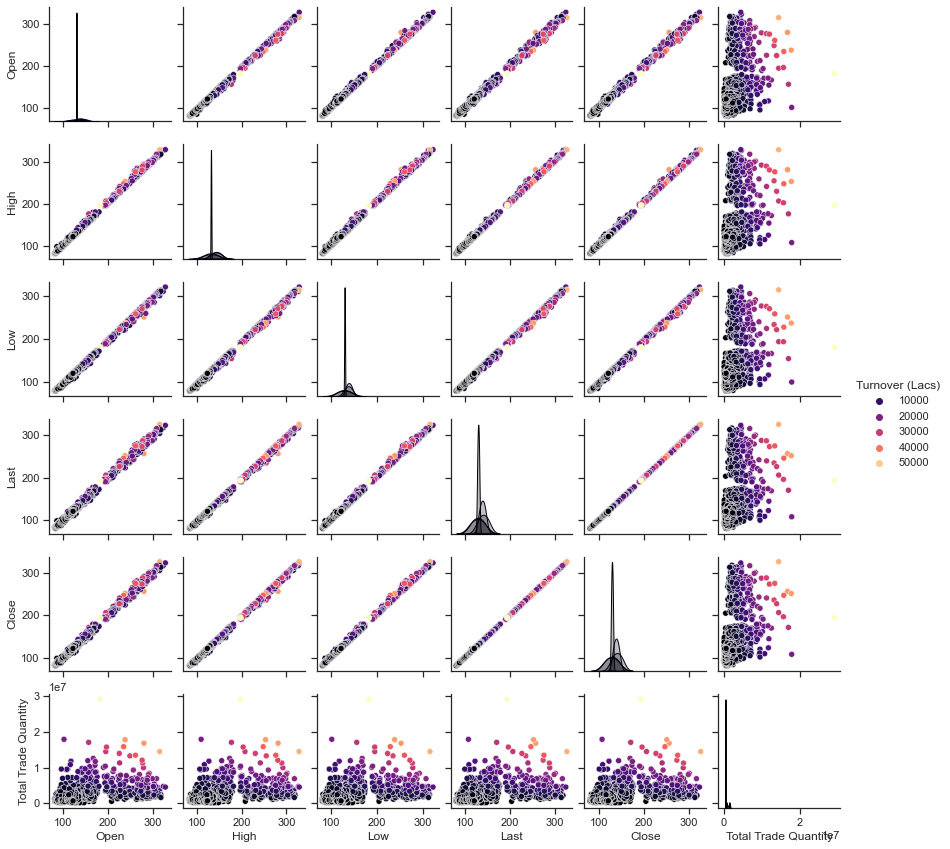

In [46]:
sb.pairplot(data, hue = 'Turnover (Lacs)', palette= "magma", height=2)
mlpb.show()

Analyzing the closing price from the Dataset

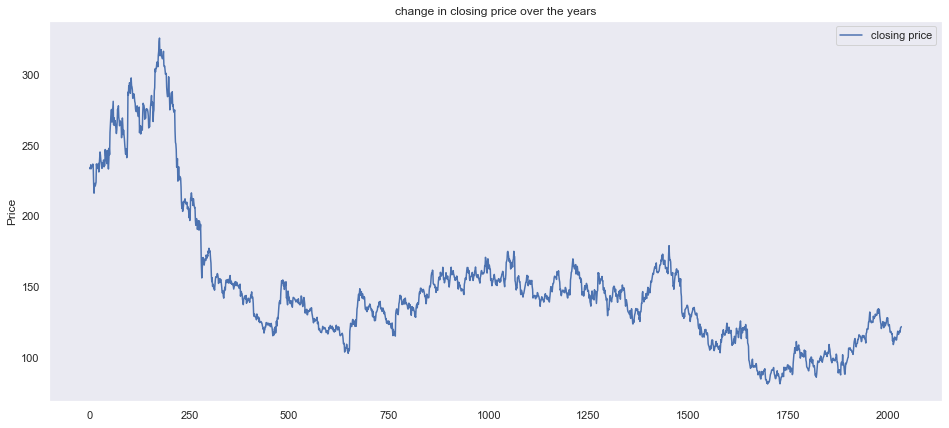

In [12]:
mlpb.figure(figsize=(10,6))
data['Close'].plot(kind='line', figsize=(16,7), c='b', label='closing price')

mlpb.ylabel("Price")
mlpb.legend(loc="upper right")
mlpb.title("change in closing price over the years")
mlpb.grid()

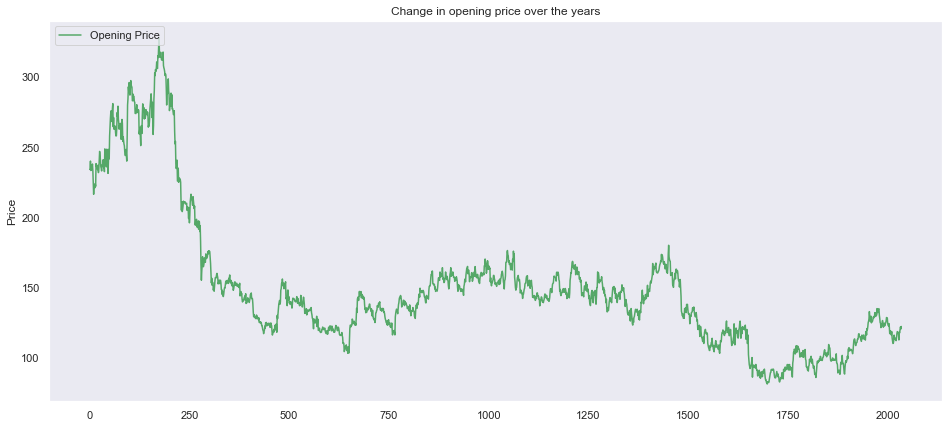

In [13]:
mlpb.figure(figsize=(10,6))
data["Open"].plot(kind='line', figsize=(16,7), c='g', label='Opening Price')

mlpb.ylabel("Price")
mlpb.legend(loc="upper left")
mlpb.title("Change in opening price over the years")
mlpb.grid()

In [19]:
df_close= data.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

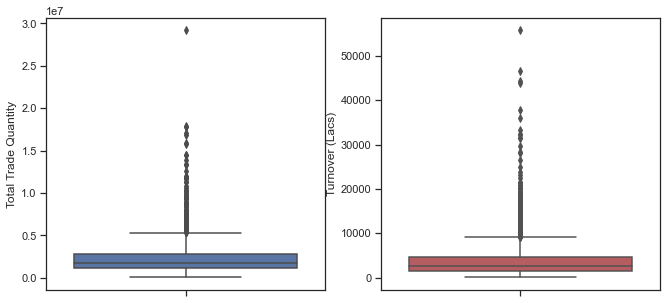

In [28]:
mlpb.figure(figsize=(11,5))
mlpb.subplot(1,2,1)
sb.boxplot(data=data, y='Total Trade Quantity', color='b')
sb.set_style("ticks")
mlpb.subplot(1,2,2)
sb.boxplot(data=data, y='Turnover (Lacs)', color='r')
sb.set_style('ticks')

In [50]:
training_set=data.reset_index()['Open']
training_set

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

* Since LSTM are sensitive to the scale of the data. So, we apply MinMaxScaler to transform our values between 0 and 1 

In [53]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set=scaler.fit_transform(np.array(df_close).reshape(-1,1))
training_set

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### Train Test Split

In [56]:
train_size=int(len(training_set)*0.75)
test_size=int(len(training_set))-train_size
train_data, test_data = training_set[0:train_size,:],training_set[train_size:len(data),:1]
train_size

1526

In [65]:
def create_dataset(dataset, time_step=1):
    dataX= [] 
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i +time_step, 0])
    return np.array(dataX), np.array(dataY)

In [66]:
time_step=100
x_train, y_train= create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [67]:
print(x_train.shape, y_train.shape)

(1425, 100) (1425,)


In [84]:
print(x_test.shape, y_test.shape)

(408, 100, 1) (408,)


* Reshaping the input(samples, timesteps, features), as this are the requirement of LSTM

In [83]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [86]:
print(x_train.shape)
print(y_train.shape)

(1425, 100, 1)
(1425,)


In [88]:
print(x_test.shape)
print(y_test.shape)

(408, 100, 1)
(408,)


### Implementing LSTM

In [102]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics="acc")

In [103]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_19 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100,batch_size= 64, verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 155ms/step - loss: 2.7737e-04 - acc: 7.0175e-04 - val_loss: 2.3379e-04 - val_acc: 0.0025
Epoch 2/100
23/23 [==============================] - 4s 159ms/step - loss: 2.3218e-04 - acc: 7.0175e-04 - val_loss: 2.0025e-04 - val_acc: 0.0025
Epoch 3/100
23/23 [==============================] - 4s 159ms/step - loss: 2.6706e-04 - acc: 7.0175e-04 - val_loss: 2.1887e-04 - val_acc: 0.0025
Epoch 4/100
23/23 [==============================] - 3s 143ms/step - loss: 2.2891e-04 - acc: 7.0175e-04 - val_loss: 2.5053e-04 - val_acc: 0.0025
Epoch 5/100
23/23 [==============================] - 3s 148ms/step - loss: 2.7300e-04 - acc: 7.0175e-04 - val_loss: 1.8859e-04 - val_acc: 0.0025
Epoch 6/100
23/23 [==============================] - 3s 144ms/step - loss: 2.6256e-04 - acc: 7.0175e-04 - val_loss: 2.0900e-04 - val_acc: 0.0025
Epoch 7/100
23/23 [==============================] - 3s 144ms/step - loss: 2.6886e-04 - acc: 7.0175e-04 - val_loss: 3.1001e-04 - v

In [130]:
#predicting and checking the metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [131]:
# transforming back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [132]:
# Calculating RMSE(Root Mean Square Error) performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

161.2302130425473

In [133]:
# RMSE test data

math.sqrt(mean_squared_error(y_test, test_predict))

104.42868036740225

### Plotting the Graph

In [134]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(training_set)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(training_set)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1:]=test_predict

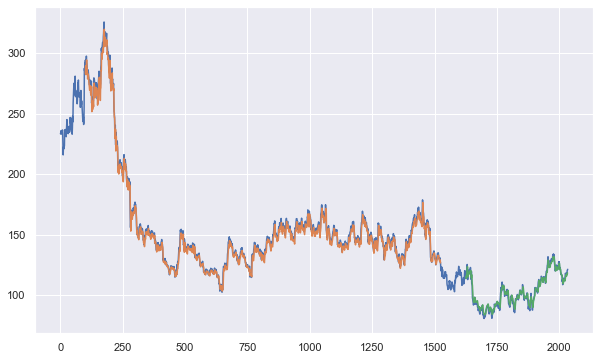

Predicted Data - Green
Complete Data - Blue
Train Data - Orange


In [139]:
# plotting predictions
mlpb.figure(figsize=(10,6))
mlpb.plot(scaler.inverse_transform(training_set))
mlpb.plot(trainPredictPlot)
mlpb.plot(testPredictPlot)
mlpb.show()

print("Predicted Data - Green")
print("Complete Data - Blue")
print("Train Data - Orange")